In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [73]:
# Bandit
class Bandit:
    def __init__(self, m):
        self.m = m
        self.N = 0
        self.mean = 0
    
    def pull(self):
        return np.random.randn() + self.m
    
    def update(self, x):
        self.N += 1
        self.mean = self.mean*(self.N-1)/self.N + x/self.N
        

In [74]:
# Experiment
def create_bandits(m_list):
    return [Bandit(m_list[i]) for i in range(len(m_list))]

## Epsilon Greedy

In [90]:
def epsilon_greedy(t, eps, bandits):
    ban_size = len(bandits)
    data = np.empty(t)
    cho_list = np.empty(t)
    
    for i in range(t):
        rand_num = np.random.rand()
        if  rand_num < eps:
            cho = np.random.choice(ban_size)
        else:
            cho = np.argmax([b.mean for b in bandits])
        x = bandits[cho].pull()
        bandits[cho].update(x)
        
        data[i] = x
        cho_list[i] = cho
        
    cumulative_average = np.cumsum(data) / (np.arange(t) + 1)
    
    for i in range(t):
        if i % 500 == 0:
            print(cho_list[i])
    
    # plot
    plt.plot(cumulative_average)
    for b in bandits:
        plt.plot(np.ones(t)*b.m)
    plt.xscale('log')
    plt.show()
    
    return cumulative_average

0.0
1.0
2.0
1.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
0.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0


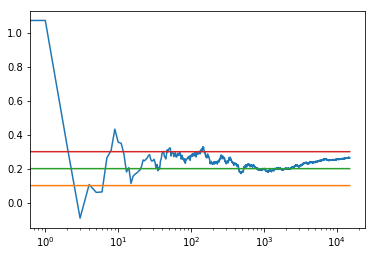

array([0.05587595, 1.0740958 , 0.32982502, ..., 0.2627888 , 0.26273306,
       0.26275594])

In [91]:
# Experiment
bandits = create_bandits([0.1, 0.2, 0.3])
epsilon_greedy(15000, 0.1, bandits)